#  Linear Regression Model

## Data Input

In [20]:
import pandas as pd

# Specify the number of rows to skip since the actual data starts after some title and metadata rows
skip_rows = 0

# Columns as provided
columns = [
    "data_id","Voltage (V)", "Current (A)", "Power (W)", "RPM", "Lin Act Pos (Pitch)", 
    "Wind Speed (m/s)", "Resistor (Ohm)", "Torque (uncertain) (oz-in)", 
    "Torque (uncertain) (N-m)", "TSR", "Wind Power (W)", "Cp", "Calc Resistance"
]

# Read the data
data = pd.read_csv('2022data.csv', skiprows=skip_rows, header=0)

# Display the first few rows
print(data.head())
print(data["Voltage (V)"])


   data_id  Voltage (V)  Current (A)  Power (W)   RPM  Lin Act Pos (Pitch)  \
0        1         6.19         1.25     7.7375   943                 1150   
1        2         6.80         1.12     7.6160  1000                 1150   
2        3         6.96         1.15     8.0040  1015                 1160   
3        4         7.02         1.15     8.0730  1020                 1170   
4        5         6.81         1.14     7.7634  1010                 1180   

   Wind Speed (m/s)  Resistor (Ohm) Torque (uncertain) (oz-in)  \
0               7.0            4.80                        NaN   
1               7.0            5.83                        NaN   
2               7.0            5.83                        NaN   
3               7.0            5.83                        NaN   
4               7.0            5.83                        NaN   

   Torque (uncertain) (N-m)       TSR  Wind Power (W)        Cp  \
0                  0.078354  3.103594       31.396833  0.246442   


## Data Cleaning
****

In [21]:

# Splitting the dataset into training and testing data
X = data.drop("Wind Speed (m/s)", axis=1)  # Features (all columns except the target column)
X = X.drop("Torque (uncertain) (oz-in)", axis = 1).drop("data_id",axis=1)
y = data["Wind Speed (m/s)"]               # Target


In [22]:
#use only rpm, linear actuator position and calc resistance!
X_limited = data.filter(["RPM","Lin Act Pos (Pitch)","Calc Resistance"])
print(X_limited)

      RPM  Lin Act Pos (Pitch)  Calc Resistance
0     943                 1150         4.952000
1    1000                 1150         6.071429
2    1015                 1160         6.052174
3    1020                 1170         6.104348
4    1010                 1180         5.973684
..    ...                  ...              ...
140  1930                 1185         5.192308
141  1840                 1190         4.444840
142  1860                 1190         4.634058
143  1870                 1190         4.797048
144  1930                 1190         5.185328

[145 rows x 3 columns]


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the wind speed for the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error for our predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the model's coefficients
print("Coefficients:", model.coef_)


Mean Squared Error: 0.0001859531550259954
Coefficients: [ 6.63280434e-02  3.52912203e-01 -1.65099790e-01  3.21003400e-03
  1.30692780e-03  4.07442912e-02  2.27657596e+01 -5.02575017e-01
  2.98364691e-02 -2.01625346e+00 -5.01216297e-02]


In [24]:

"""Less data"""
print("Less Data")
X_lim_train, X_lim_test, y_lim_train, y_lim_test = train_test_split(X_limited, y, test_size=0.4, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_lim_train, y_lim_train)

# Predict the wind speed for the testing set
y_lim_pred = model.predict(X_lim_test)

# Calculate the mean squared error for our predictions
mse = mean_squared_error(y_lim_test, y_lim_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the model's coefficients
print("Coefficients:", model.coef_)

Less Data
Mean Squared Error: 0.03805891617527853
Coefficients: [ 0.00460941  0.00713403 -0.07143567]


## Matplotlib ploting

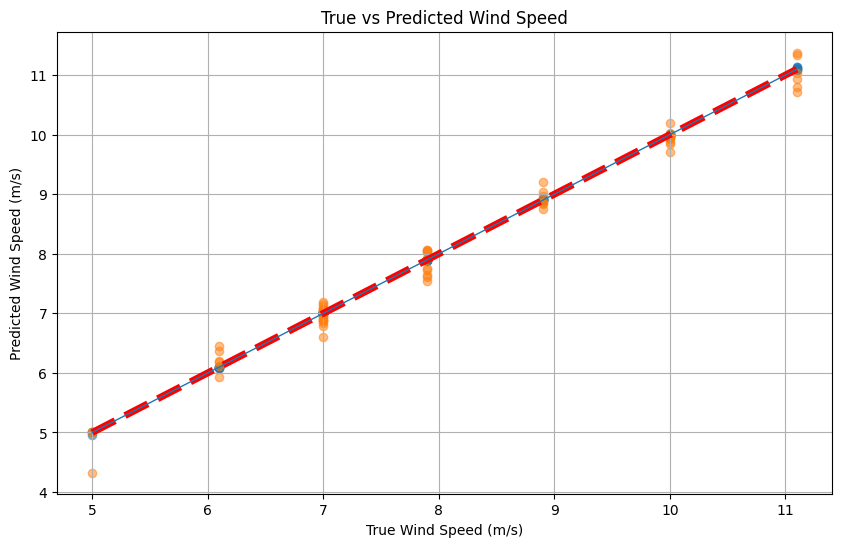

In [34]:
import matplotlib.pyplot as plt

# Assuming you've trained your model and made predictions as follows:
# y_pred = model.predict(X_test)

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.scatter(y_lim_test, y_lim_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('True Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('True vs Predicted Wind Speed')
plt.grid(True)
# plt.ylim(5.8, 6.2)
plt.show()


## Restrict Windspeed to see linear relationship

In [50]:
"""Restrict wind speed to 8"""
X_restrict = data.filter(["RPM","Lin Act Pos (Pitch)","Calc Resistance","Wind Speed (m/s)"])
X_restrict = X_restrict[X_restrict["Wind Speed (m/s)"] <= 8]
Y_restrict = X_restrict["Wind Speed (m/s)"]
X_restrict = X_restrict.drop("Wind Speed (m/s)", axis=1)
# print(X_restrict)


"""Restrict wind speed to 6"""
X_restrict_6 = data.filter(["RPM","Lin Act Pos (Pitch)","Calc Resistance","Wind Speed (m/s)"])
X_restrict_6 = X_restrict_6[X_restrict_6["Wind Speed (m/s)"] <= 7]

print(X_restrict_6)
Y_restrict_6 = X_restrict_6["Wind Speed (m/s)"]
X_restrict_6 = X_restrict_6.drop("Wind Speed (m/s)", axis=1)
# print(X_restrict_6)

     RPM  Lin Act Pos (Pitch)  Calc Resistance  Wind Speed (m/s)
0    943                 1150         4.952000               7.0
1   1000                 1150         6.071429               7.0
2   1015                 1160         6.052174               7.0
3   1020                 1170         6.104348               7.0
4   1010                 1180         5.973684               7.0
5    958                 1166         4.952756               7.0
6    973                 1166         5.192000               7.0
7    988                 1166         5.393443               7.0
8   1020                 1166         6.042735               7.0
9   1045                 1166         6.412281               7.0
10   958                 1168         4.984127               7.0
11   988                 1168         5.208000               7.0
12  1000                 1168         5.390244               7.0
13  1025                 1168         6.068966               7.0
14  1047                 

In [51]:
"""training, run previous first"""
print("Restricted Data")
X_res_train, _, y_res_train, _ = train_test_split(X_restrict, Y_restrict, test_size=0.01, random_state=42) #no need test data


model = LinearRegression()
model.fit(X_res_train, y_res_train)


y_res_pred = model.predict(X_lim_test) #Using test with more wind speed

# Calculate the mean squared error for our predictions
mse = mean_squared_error(y_lim_test, y_res_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the model's coefficients
print("Coefficients:", model.coef_)

"""training, run previous first"""
print("Restricted Data")
X_res_train_6, _, y_res_train_6, _ = train_test_split(X_restrict_6, Y_restrict_6, test_size=0.01, random_state=42) #no need test data
print(X_res_train_6)
print(y_res_train_6)

model_6 = LinearRegression()
model_6.fit(X_res_train_6, y_res_train_6)


y_res_pred_6 = model_6.predict(X_lim_test) #Using test with more wind speed

# Calculate the mean squared error for our predictions
mse = mean_squared_error(y_lim_test, y_res_pred_6)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the model's coefficients
print("Coefficients for model6:", model_6.coef_)

Restricted Data
Mean Squared Error: 0.039595431206111184
Coefficients: [ 0.00456184  0.01237282 -0.06760832]
Restricted Data
     RPM  Lin Act Pos (Pitch)  Calc Resistance
5    958                 1166         4.952756
61   690                 1180        11.653944
13  1025                 1168         6.068966
19  1050                 1170         6.412281
78   960                 1170        10.103397
64   830                 1170        21.963636
26   973                 1174         5.241935
72   990                 1160        11.612903
12  1000                 1168         5.390244
82   880                 1170         7.750643
3   1020                 1170         6.104348
62   870                 1180        33.350254
30  1055                 1172         6.394737
8   1020                 1166         6.042735
17   988                 1170         5.390244
6    973                 1166         5.192000
4   1010                 1180         5.973684
69   860                 1160

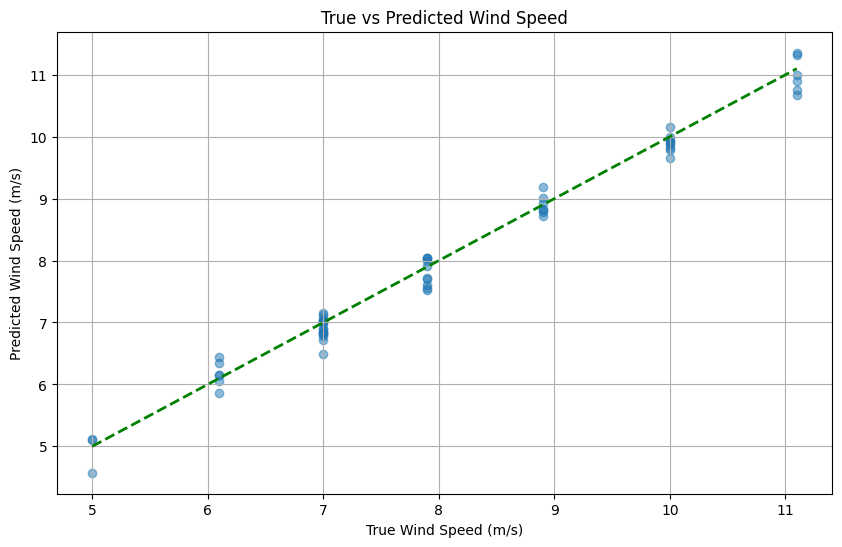

In [52]:
"""plotting"""
import matplotlib.pyplot as plt

# Assuming you've trained your model and made predictions as follows:
# y_pred = model.predict(X_test)

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
# plt.scatter(y_lim_test, y_res_pred, alpha=0.5)
plt.scatter(y_lim_test, y_res_pred_6, alpha=0.5)
plt.plot([y_lim_test.min(), y_lim_test.max()], [y_lim_test.min(), y_lim_test.max()], '--g', linewidth=2)
plt.xlabel('True Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('True vs Predicted Wind Speed')
plt.grid(True)
# plt.ylim(5.8, 6.2)
plt.show()
